# Project 6 - DSCI 614 Text Mining
## Jeffery Boczkaja

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the dataset of sentiment140.csv into memory.

In [2]:
df1 = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None)
df1.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
num_rows = df1.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 1600000


In [4]:
count_rows_with_value_2 = (df1.iloc[:, 0] == 2).sum()
print(f"The number of rows with the value 2 in the first column is: {count_rows_with_value_2}")

The number of rows with the value 2 in the first column is: 0


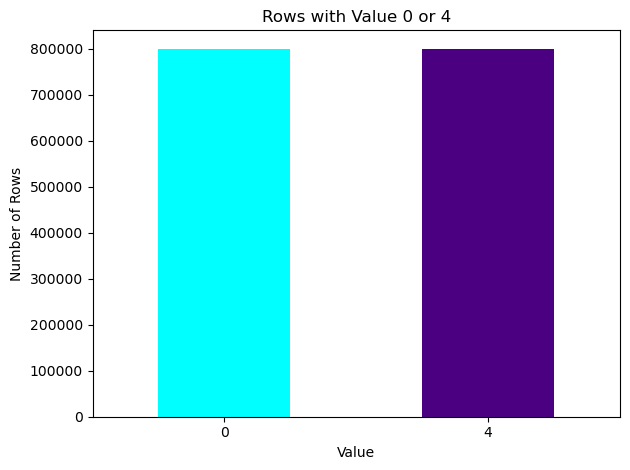

In [5]:
filtered_counts = df1[df1.iloc[:,0].isin([0,4])].iloc[:,0].value_counts()

filtered_counts.plot(kind='bar', color=['aqua', 'indigo'])
plt.title("Rows with Value 0 or 4")
plt.xlabel("Value")
plt.ylabel("Number of Rows")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
first_5000 = df1.iloc[:100]
rows_800001_to_805001 = df1.iloc[800000:800100]
df = pd.concat([first_5000, rows_800001_to_805001], axis=0)

When I saw how long others run times were I decided to break my data up into a smaller sample for convenience, also I was running out of time so the sets are not as big as needed to get truly reliable data. I manually checked the actual data set to see where the polarity changed from 0 to 4 because there were no values of 2.

In [7]:
num_rows = df.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 200


In [8]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.tail()

,0,1,2,3,4,5
800095,4,1467826078,Mon Apr 06 22:23:46 PDT 2009,NO_QUERY,abbynoodle123,21 Days till chris comes home and 67 days till...
800096,4,1467841066,Mon Apr 06 22:27:44 PDT 2009,NO_QUERY,Cynnergies,"@davidgideon Yeah, those were the days - no, ..."
800097,4,1467841077,Mon Apr 06 22:27:42 PDT 2009,NO_QUERY,Ariana6702,@therealjspace am I the first one to tell you ...
800098,4,1467841096,Mon Apr 06 22:27:43 PDT 2009,NO_QUERY,HayyItsRay,@its_anne Kay thanks.
800099,4,1467841114,Mon Apr 06 22:27:43 PDT 2009,NO_QUERY,kathrynsuzanne,Goodnight


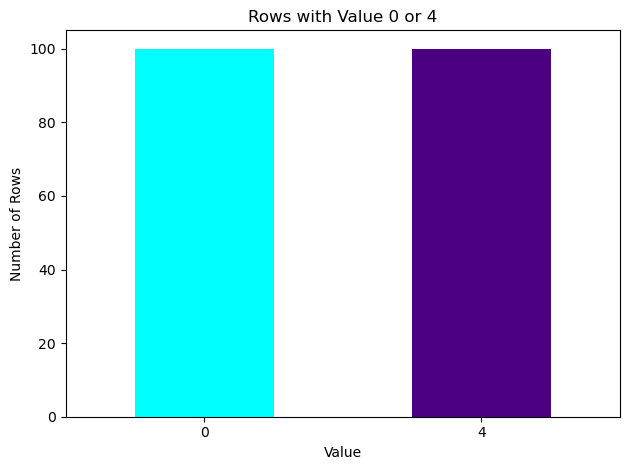

In [10]:
filtered_counts = df[df.iloc[:,0].isin([0,4])].iloc[:,0].value_counts()

filtered_counts.plot(kind='bar', color=['aqua', 'indigo'])
plt.title("Rows with Value 0 or 4")
plt.xlabel("Value")
plt.ylabel("Number of Rows")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2. Clean and preprocess the texts.

In [11]:
df_subset = df.iloc[:, [0, 5]]

In [12]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 800099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    int64 
 1   5       200 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [13]:
num_rows = df_subset.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 200


In [14]:
df_subset.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [15]:
df_subset.tail()

,0,5
800095,4,21 Days till chris comes home and 67 days till...
800096,4,"@davidgideon Yeah, those were the days - no, ..."
800097,4,@therealjspace am I the first one to tell you ...
800098,4,@its_anne Kay thanks.
800099,4,Goodnight


### Tokenization and Lemmatization; Create Transformer

In [16]:
import string
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_ for word in mytokens if word not in stop_words]
    return mytokens

In [17]:
import re
from sklearn.base import TransformerMixin

class features(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    
    def fit(self, X, y= None, **fit_params):
        return self
    
    def get_params(self, deep= True):
        return {}

def clean_text(text):
    text = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text.strip().lower()  

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_subset['encoded_column'] = le.fit_transform(df_subset.iloc[:, 0])

print(df_subset['encoded_column'].value_counts(normalize=True))

0    0.5
1    0.5
Name: encoded_column, dtype: float64


C:\Users\whitl\AppData\Local\Temp\ipykernel_20340\1786932018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['encoded_column'] = le.fit_transform(df_subset.iloc[:, 0])


In [19]:
from sklearn.model_selection import train_test_split

X = df_subset.iloc[:, 1]
y = df_subset.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(f'X_train dimension: {X_train.shape}; y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}; y_train dimension: {y_test.shape}')

X_train dimension: (160,); y_train dimension: (160,)
X_test dimension: (40,); y_train dimension: (40,)


In [20]:
X_train.head()

54                                            I need a hug 
800075    @drdrew *gives a hug and a cookie* Hope you fe...
78                    i think my arms are sore from tennis 
800000         I LOVE @Health4UandPets u guys r the best!! 
800058    @ash_CT Aw dont you love that  I love for thos...
Name: 5, dtype: object

### 3. Build the first model based on pipeline using the support vector machines.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from time import time

t0 = time()

tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range = (1,1))

classifier = LogisticRegression()

pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", tfidf_vector),
                 ("classifier", classifier)])

pipeline.fit(X_train, y_train)

print(f"It takes about {time() - t0:.1f} seconds")

C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


It takes about 1.1 seconds


Confusion matrix, without normalization
[[12  8]
 [ 8 12]]
Normalized confusion matrix
[[0.6 0.4]
 [0.4 0.6]]


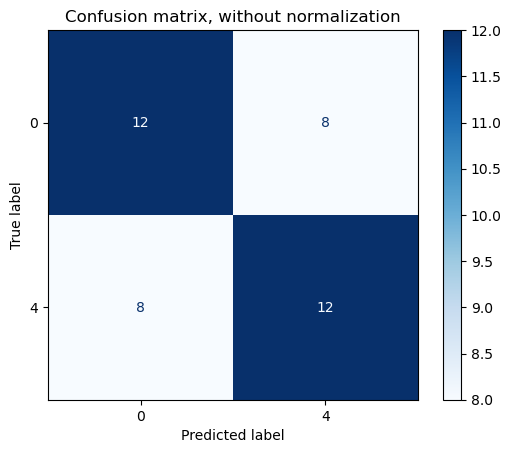

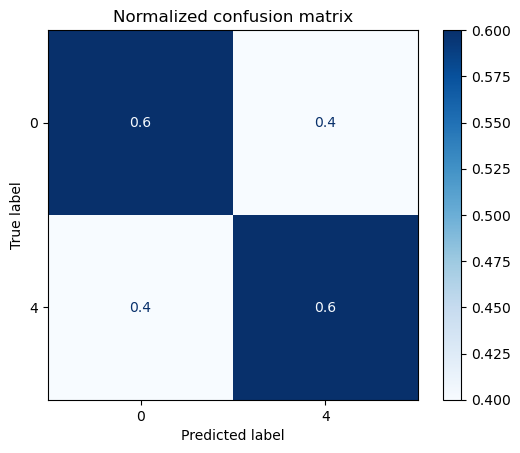

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
target_names = ['0', '4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [23]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           4       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



### 4. Check the first model. Is it a good model based on the selected evaluation metrics?

The first model is not a good model. First off we need to acknowledge that we had to use a small sample for time's sake. The value was better when a larger sample size was utilized but due to constraints albiet with later models, the sample size was drastically reduced. That being said even with 10,000 samples the results only maxed out at .75 and this model only made it to .6. That is not a very reliable score.

### 5. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time

pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", TfidfVectorizer(tokenizer = spacy_tokenizer)),
                 ("classifier", DecisionTreeClassifier())])

parameters = {
    'vectorizer__max_df': (0.5, 1.0),
    'vectorizer__ngram_range': ((1, 1), (1,2)),
    'vectorizer__use_idf': (True, False),
    'classifier__max_features': ["sqrt"],
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=None, verbose=1)

print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

t0 = time()
grid_search.fit(X_train, y_train)
print(f"It takes about {time() - t0:.1f} seconds.")
print()

print(f"Best score= {grid_search.best_score_:0.3f}")
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
{'classifier__max_features': ['sqrt'],
 'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__use_idf': (True, False)}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sk

It takes about 41.3 seconds.

Best score= 0.600
Best parameters set:
	classifier__max_features: 'sqrt'
	vectorizer__max_df: 1.0
	vectorizer__ngram_range: (1, 1)
	vectorizer__use_idf: True


Confusion matrix, without normalization
[[12  8]
 [ 5 15]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.25 0.75]]


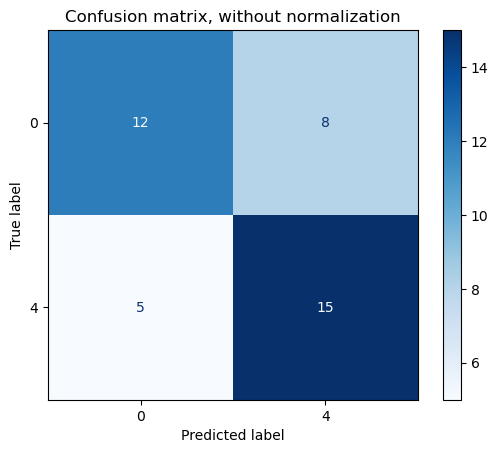

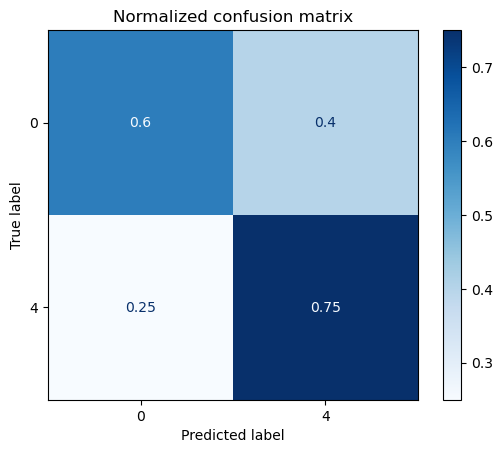

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_names = ['0', '4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           4       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



###  6. Tune the second model using the support vector machines and perform model diagnostics. Is it a good model?

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time

pipeline = Pipeline([
    ("cleaner", features()),
    ("vectorizer", TfidfVectorizer(
        tokenizer=spacy_tokenizer,
        max_df=0.5,
        ngram_range=(1, 1),
        use_idf=True
    )),
    ("classifier", DecisionTreeClassifier(max_features='sqrt'))
])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=None, verbose=1)

print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

t0 = time()
grid_search.fit(X_train, y_train)
print(f"It takes about {time() - t0:.1f} seconds.")
print()

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
{'classifier__max_features': ['sqrt'],
 'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__use_idf': (True, False)}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sk

It takes about 41.7 seconds.



Confusion matrix, without normalization
[[ 7 13]
 [ 4 16]]
Normalized confusion matrix
[[0.35 0.65]
 [0.2  0.8 ]]


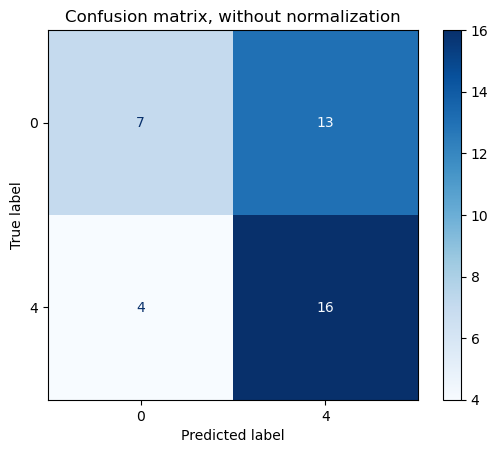

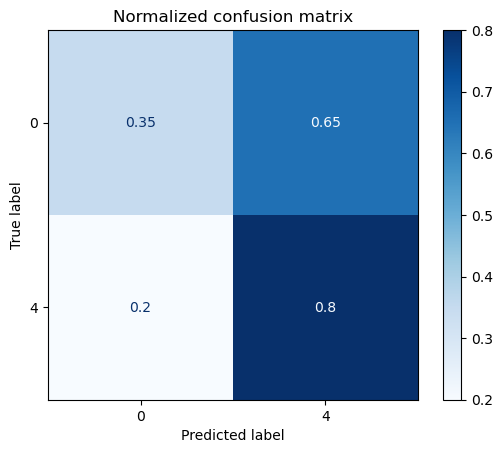

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
target_names = ['0', '4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test,
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [29]:
from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45        20
           4       0.55      0.80      0.65        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.55        40
weighted avg       0.59      0.57      0.55        40



This is not a good model, ironically when you tune it with the best parameters the model becomes worse! More testing would need to be done to tune them even more but as stated earlier, a larger sample size to work with is what we need. We cannot do this because of time contraints.

### 7. Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:
### - Logistic regression
### - Support Vector Machine
### - Random Forest

In [30]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

class ClfSwitcher(BaseEstimator):
    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):

        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [31]:
import spacy
nlp = spacy.load("en_core_web_sm")
def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [tok.orth_ for tok in tokens if not tok.is_punct and not tok.is_space]
    return tokens

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline ([("cleaner", features()),
                 ("vectorizer", TfidfVectorizer()),
                 ("classifier", ClfSwitcher())])

parameters = [
    {
        'vectorizer__tokenizer': [spacy_tokenizer],
        'vectorizer__max_df': [1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [SGDClassifier()], 
        'classifier__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'classifier__estimator__max_iter': [50, 80],
        'classifier__estimator__tol': [1e-4],
        'classifier__estimator__loss': ['hinge', 'log', 'modified_huber'],
    },
    {
        'vectorizer__tokenizer': [spacy_tokenizer],
        'vectorizer__max_df': [1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': [None],
        'classifier__estimator': [MultinomialNB()],
        'classifier__estimator__alpha': (1e-2, 1e-3, 1e-1), },
]


print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

t0 = time()
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=None, return_train_score=False, verbose=3)
gscv.fit(X_train, y_train)
print(f"It takes about {time() - t0:.3f} seconds")

Performing grid search...
The pipeline contains: ['cleaner', 'vectorizer', 'classifier']
parameters are as follows:
[{'classifier__estimator': [SGDClassifier()],
  'classifier__estimator__loss': ['hinge', 'log', 'modified_huber'],
  'classifier__estimator__max_iter': [50, 80],
  'classifier__estimator__penalty': ('l2', 'elasticnet', 'l1'),
  'classifier__estimator__tol': [0.0001],
  'vectorizer__max_df': [1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': ['english', None],
  'vectorizer__tokenizer': [<function spacy_tokenizer at 0x0000023CD53BE340>]},
 {'classifier__estimator': [MultinomialNB()],
  'classifier__estimator__alpha': (0.01, 0.001, 0.1),
  'vectorizer__max_df': [1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': [None],
  'vectorizer__tokenizer': [<function spacy_tokenizer at 0x0000023CD53BE340>]}]
Fitting 5 folds for each of 78 candidates, totalling 390 fits


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   1.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   1.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   1.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=hinge, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.8s
[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.3s
[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=e

[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.1s
[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.1s
[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, 

[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   0.6s
[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   0.7s
[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, v

[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   0.7s
[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   0.7s
[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english

[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.0s
[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.0s
[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, 

[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   2.1s
[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=nan total time=   0.7s
[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=log, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None

C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.5s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.438 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   3.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.7s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.5s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.6s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=50, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.5s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   1.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.469 total time=   2.5s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l2, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.6s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=elasticnet, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   2.1s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   2.4s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.7s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.750 total time=   2.7s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.3s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.500 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=english, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   2.2s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.719 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=SGDClassifier(), classifier__estimator__loss=modified_huber, classifier__estimator__max_iter=80, classifier__estimator__penalty=l1, classifier__estimator__tol=0.0001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.8s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.01, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   1.0s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.001, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.594 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.625 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l1, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.531 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 1/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.688 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 2/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 3/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 4/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.656 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV 5/5] END classifier__estimator=MultinomialNB(), classifier__estimator__alpha=0.1, vectorizer__max_df=1.0, vectorizer__norm=l2, vectorizer__stop_words=None, vectorizer__tokenizer=<function spacy_tokenizer at 0x0000023CD53BE340>;, score=0.562 total time=   0.9s


C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 390.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\whitl\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

It takes about 614.687 seconds


In [32]:
try:
    print(f"Best score= {gscv.best_score_:0.3f}")
except AttributeError:
    print("GridSearch did not successfully complete. best_score_ not found.")

Best score= 0.656


In [33]:
print(f"Best score= {gscv.best_score_:0.3f}")
best_parameters = gscv.best_estimator_.get_params()

all_classifiers =[]
for parameter in parameters:
    all_classifiers.append(parameter['classifier__estimator'])
all_classifiers = [str(alg) for clf in all_classifiers for alg in clf]
print("All potential classifiers:")
pprint(all_classifiers)

idx = all_classifiers.index(str(best_parameters['classifier__estimator']))
print("Best parameters set:")
for param_name in sorted(parameters[idx].keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score= 0.656
All potential classifiers:
["SGDClassifier(loss='modified_huber', max_iter=50, penalty='l1', tol=0.0001)",
 'MultinomialNB()']
Best parameters set:
	classifier__estimator: SGDClassifier(loss='modified_huber', max_iter=50, penalty='l1', tol=0.0001)
	classifier__estimator__loss: 'modified_huber'
	classifier__estimator__max_iter: 50
	classifier__estimator__penalty: 'l1'
	classifier__estimator__tol: 0.0001
	vectorizer__max_df: 1.0
	vectorizer__norm: 'l1'
	vectorizer__stop_words: None
	vectorizer__tokenizer: <function spacy_tokenizer at 0x0000023CD53BE340>


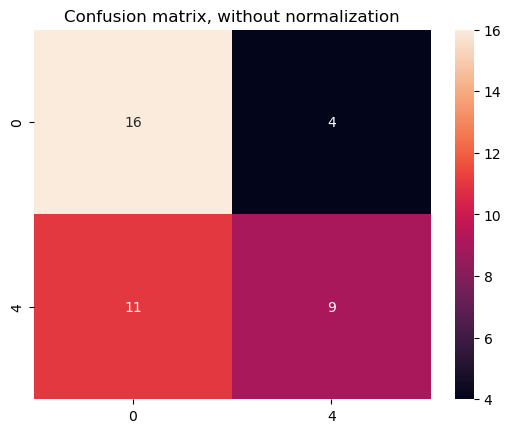

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = gscv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt = 'd', xticklabels = target_names, yticklabels = target_names)
ax.set_title("Confusion matrix, without normalization")
plt.show()

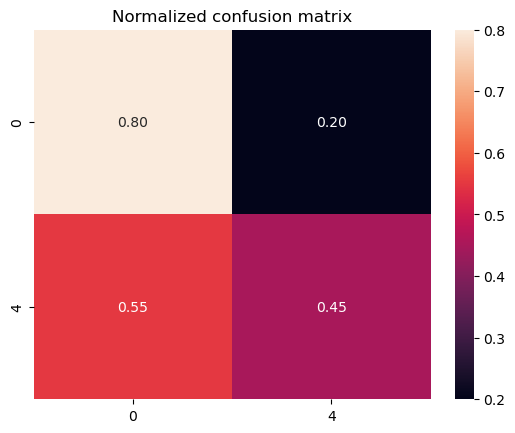

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = gscv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float64).sum(axis=1)[:,None]
ax = plt.axes()

sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels = target_names, yticklabels = target_names)
ax.set_title("Normalized confusion matrix")
plt.show()

In [36]:
from sklearn.metrics import classification_report
y_pred = gscv.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           4       0.69      0.45      0.55        20

    accuracy                           0.62        40
   macro avg       0.64      0.62      0.61        40
weighted avg       0.64      0.62      0.61        40



### 8. Tune the third model and perform model diagnostics. Is it a good model? 

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [tok.orth_ for tok in tokens if not tok.is_punct and not tok.is_space]
    return tokens

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("cleaner", features()),
    ("vectorizer", TfidfVectorizer(
        tokenizer=spacy_tokenizer,
        max_df=1.0,
        norm='l2',
        stop_words=None
    )),
    ("classifier", ClfSwitcher(estimator=SGDClassifier(
        loss='modified_huber',
        max_iter=80,
        penalty='l2',
        tol=0.0001
    )))
])

In [38]:
try:
    print(f"Best score= {gscv.best_score_:0.3f}")
except AttributeError:
    print("GridSearch did not successfully complete. best_score_ not found.")

Best score= 0.656


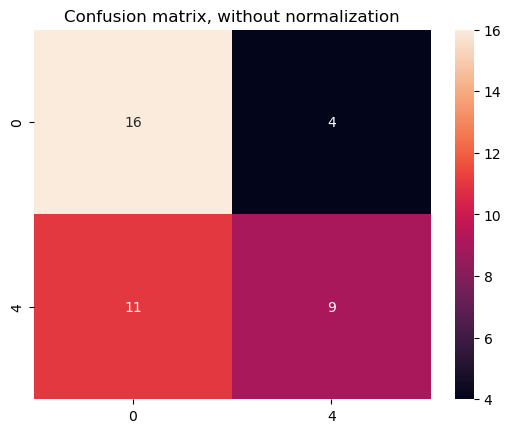

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = gscv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()

sns.heatmap(cm, annot=True, fmt = 'd', xticklabels = target_names, yticklabels = target_names)
ax.set_title("Confusion matrix, without normalization")
plt.show()

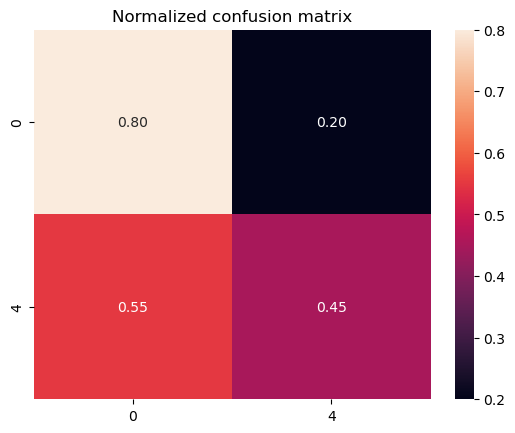

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = gscv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.astype(np.float64).sum(axis=1)[:,None]
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels = target_names, yticklabels = target_names)
ax.set_title("Normalized confusion matrix")
plt.show()

In [41]:
from sklearn.metrics import classification_report

y_pred = gscv.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           4       0.69      0.45      0.55        20

    accuracy                           0.62        40
   macro avg       0.64      0.62      0.61        40
weighted avg       0.64      0.62      0.61        40



This is not a great model. The accuracy was only .62. Even with the tuning of parameters the outcome was still the same as before when we ran the model. Even the macro and weighted average stayed the same. I would reccomend trying to find more parameters and see how those work out. Same as with all the other models, we would need more time to run a larger sample size to get even better results than we are seeing.